## Download BanglaLekha-Isolated Dataset

In [1]:
!wget "https://data.mendeley.com/public-files/datasets/hf6sf8zrkc/files/ffe73a3a-5999-4ad2-970f-3e14c141cdb1/file_downloaded" -O "BanglaLekha-Isolated.zip"

--2022-10-30 03:07:42--  https://data.mendeley.com/public-files/datasets/hf6sf8zrkc/files/ffe73a3a-5999-4ad2-970f-3e14c141cdb1/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/9b1b5e74-53e5-4fe4-9638-a6a04da36a36 [following]
--2022-10-30 03:07:42--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/9b1b5e74-53e5-4fe4-9638-a6a04da36a36
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.92.16.122, 52.218.40.144, 52.218.28.136, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.92.16.122|:4

## Unzip the file

In [2]:
!unzip "BanglaLekha-Isolated.zip"

Streaming output truncated to the last 5000 lines.
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1100_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1132_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1133_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1143_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1144_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1145_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1146_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1173_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1174_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1175_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1177_83.png  
  inflating: BanglaLekha-Isolated/Images/83/02_0002_0_19_1016_1181_83.png  
  inflating: BanglaLekha-Isolated/Ima

## Import necessary libraries

In [3]:
import os
import random
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Input, Dense
from keras.utils import to_categorical
from keras.models import Model
from keras.callbacks import ModelCheckpoint

## Rename the directories to their corresponding alphabet

In [4]:
alphabet = {
    '1': 'অ',
    '2': 'আ',
    '3': 'ই',
    '4':'ঈ',
    '5':'উ',
    '6':'ঊ',
    '7':'ঋ',
    '8':'এ',
    '9':'ঐ',
    '10':'ও',
    '11':'ঔ ',
    '12':'ক',
    '13':'খ',
    '14':'গ',
    '15':'ঘ',
    '16':'ঙ',
    '17':'চ',
    '18':'ছ',
    '19':'জ',
    '20':'ঝ',
    '21':'ঞ',
    '22':'ট',
    '23':'ঠ',
    '24':'ড',
    '25':'ঢ',
    '26':'ণ',
    '27':'ত',
    '28':'থ',
    '29':'দ',
    '30':'ধ',
    '31':'ন',
    '32':'প',
    '33':'ফ',
    '34':'ব',
    '35':'ভ',
    '36':'ম',
    '37':'য',
    '38':'র',
    '39':'ল',
    '40':'শ',
    '41':'ষ',
    '42':'স',
    '43':'হ',
    '44':'ড়',
    '45':'ঢ়',
    '46':'য়',
    '47':'ৎ',
    '48':'ং',
    '49':'ঃ',
    '50':'ঁ',
    '51':'০',
    '52':'১',
    '53':'২',
    '54':'৩',
    '55':'৪',
    '56':'৫',
    '57':'৬',
    '58':'৭',
    '59':'৮',
    '60':'৯',
    '61':'ক্ষ',
    '62':'ব্দ',
    '63':'ঙ্গ',
    '64':'স্ক',
    '65':'স্ফ​',
    '66':'স্থ ',
    '67':'চ্ছ',
    '68':'ক্ত',
    '69':'স্ন',
    '70':'ষ্ণ ',
    '71':'ম্প',
    '72':'হ্ম', 
    '73':'প্ত',
    '74':'ম্ব',
    '75':'ন্ড​',
    '76':'দ্ভ',
    '77':'ন্থ',
    '78':'ষ্ঠ ',
    '79':'ল্প',
    '80':'ষ্প',
    '81':'ন্দ',
    '82':'ন্ধ',
    '83':'ম্ম',
    '84':'ন্ঠ​​',
}

alphabet

{'1': 'অ',
 '2': 'আ',
 '3': 'ই',
 '4': 'ঈ',
 '5': 'উ',
 '6': 'ঊ',
 '7': 'ঋ',
 '8': 'এ',
 '9': 'ঐ',
 '10': 'ও',
 '11': 'ঔ ',
 '12': 'ক',
 '13': 'খ',
 '14': 'গ',
 '15': 'ঘ',
 '16': 'ঙ',
 '17': 'চ',
 '18': 'ছ',
 '19': 'জ',
 '20': 'ঝ',
 '21': 'ঞ',
 '22': 'ট',
 '23': 'ঠ',
 '24': 'ড',
 '25': 'ঢ',
 '26': 'ণ',
 '27': 'ত',
 '28': 'থ',
 '29': 'দ',
 '30': 'ধ',
 '31': 'ন',
 '32': 'প',
 '33': 'ফ',
 '34': 'ব',
 '35': 'ভ',
 '36': 'ম',
 '37': 'য',
 '38': 'র',
 '39': 'ল',
 '40': 'শ',
 '41': 'ষ',
 '42': 'স',
 '43': 'হ',
 '44': 'ড়',
 '45': 'ঢ়',
 '46': 'য়',
 '47': 'ৎ',
 '48': 'ং',
 '49': 'ঃ',
 '50': 'ঁ',
 '51': '০',
 '52': '১',
 '53': '২',
 '54': '৩',
 '55': '৪',
 '56': '৫',
 '57': '৬',
 '58': '৭',
 '59': '৮',
 '60': '৯',
 '61': 'ক্ষ',
 '62': 'ব্দ',
 '63': 'ঙ্গ',
 '64': 'স্ক',
 '65': 'স্ফ\u200b',
 '66': 'স্থ ',
 '67': 'চ্ছ',
 '68': 'ক্ত',
 '69': 'স্ন',
 '70': 'ষ্ণ ',
 '71': 'ম্প',
 '72': 'হ্ম',
 '73': 'প্ত',
 '74': 'ম্ব',
 '75': 'ন্ড\u200b',
 '76': 'দ্ভ',
 '77': 'ন্থ',
 '78': 'ষ্ঠ ',
 '79': 'ল্প',
 '80'

In [5]:
PATH = './BanglaLekha-Isolated/Images/'
data_dir_list = os.listdir(PATH)

for dirname in data_dir_list:
  os.rename(PATH+dirname, PATH+alphabet[dirname])

In [6]:
data_dir_list = os.listdir(PATH)
print(data_dir_list)

['ঝ', 'ধ', 'ক্ত', 'ঊ', 'ন্দ', 'স্ক', 'ষ', 'চ্ছ', 'ব', '৫', 'ন্থ', 'ঘ', 'ষ্ঠ ', 'প্ত', 'ং', 'ফ', 'উ', 'ম্প', 'স', 'ম্ম', 'ব্দ', 'ন্ড\u200b', 'ঃ', '৯', 'ও', 'ষ্প', 'ল', 'ৎ', '২', 'হ্ম', 'য', 'ঋ', 'ম', 'ক', 'ঢ়', 'চ', '৭', 'ভ', 'ষ্ণ ', 'স্ফ\u200b', 'ঔ ', 'শ', 'দ্ভ', 'অ', 'য়', 'হ', 'ন্ঠ\u200b\u200b', 'ঙ', 'ড', 'ট', 'ঙ্গ', 'জ', 'এ', '৪', 'খ', 'ন', 'দ', '১', 'ণ', 'ঈ', 'আ', 'স্ন', 'ড়', 'ক্ষ', 'ন্ধ', '০', 'প', 'ই', 'ঞ', '৮', 'ত', '৬', '৩', 'ঐ', 'র', 'গ', 'ঢ', 'থ', 'স্থ ', 'ছ', 'ঁ', 'ঠ', 'ল্প', 'ম্ব']


## Load the dataset

In [7]:
img_rows=25
img_cols=25
num_channel=3

img_data_list=[]
img_data = np.zeros((166105, img_rows, img_cols, num_channel), dtype=np.float32)
classes_names_list=[]
target_column=[]

In [8]:
i = 0

for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Loading images from {} folder\n".format(dataset))
    img_list = os.listdir(PATH+'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH + '/' + dataset + '/' + img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))

        img_data[i] = np.array(input_img_resize, dtype=np.float32) / 255
        i += 1

        target_column.append(dataset)

Loading images from ঝ folder

Loading images from ধ folder

Loading images from ক্ত folder

Loading images from ঊ folder

Loading images from ন্দ folder

Loading images from স্ক folder

Loading images from ষ folder

Loading images from চ্ছ folder

Loading images from ব folder

Loading images from ৫ folder

Loading images from ন্থ folder

Loading images from ঘ folder

Loading images from ষ্ঠ  folder

Loading images from প্ত folder

Loading images from ং folder

Loading images from ফ folder

Loading images from উ folder

Loading images from ম্প folder

Loading images from স folder

Loading images from ম্ম folder

Loading images from ব্দ folder

Loading images from ন্ড​ folder

Loading images from ঃ folder

Loading images from ৯ folder

Loading images from ও folder

Loading images from ষ্প folder

Loading images from ল folder

Loading images from ৎ folder

Loading images from ২ folder

Loading images from হ্ম folder

Loading images from য folder

Loading images from ঋ folder

Loading imag

In [29]:
num_classes = len(classes_names_list)
print(num_classes)

84


In [10]:
print(img_data.shape)

(166105, 25, 25, 3)


In [11]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [12]:
import sys
sys.getsizeof(img_data)/(2<<20)

594.0378437042236

In [13]:
previous_target_column = target_column

## Preprocess the dataset

In [14]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [15]:
target_column_hotcoded = to_categorical(target_column, num_classes)

X,Y = shuffle(img_data, target_column_hotcoded, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Define the model architecture

In [ ]:
num_epoch = 50
batch_size = 256

In [ ]:
validation_split = 0.2

In [30]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=num_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
# Model Architecture

print(f'Summary: {model.summary()}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        896       
                                                                 
 dropout_9 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 dropout_11 (Dropout)        (None, 12, 12, 64)        0         
                                                      

## Define checkpoints

In [32]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "checkpoints/cp-{epoch:04d}.ckpt"

In [33]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

## Train

In [34]:
# Fit data to model

print(f'Training ...')

history = model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = num_epoch,
          verbose = 1,
          callbacks=[cp_callback],
          validation_split = validation_split)

Training ...
Epoch 1/50
416/416 [==============================] - 8s 16ms/step - loss: 2.5781 - accuracy: 0.3348 - val_loss: 1.3694 - val_accuracy: 0.7194
Epoch 2/50
416/416 [==============================] - 6s 14ms/step - loss: 1.1967 - accuracy: 0.6522 - val_loss: 0.9027 - val_accuracy: 0.8137
Epoch 3/50
416/416 [==============================] - 7s 17ms/step - loss: 0.9336 - accuracy: 0.7278 - val_loss: 0.7351 - val_accuracy: 0.8401
Epoch 4/50
 31/416 [=>............................] - ETA: 5s - loss: 0.8375 - accuracy: 0.7581
Epoch 4: saving model to checkpoints/cp-0004.ckpt
416/416 [==============================] - 7s 17ms/step - loss: 0.8164 - accuracy: 0.7635 - val_loss: 0.6235 - val_accuracy: 0.8538
Epoch 5/50
416/416 [==============================] - 7s 16ms/step - loss: 0.7416 - accuracy: 0.7847 - val_loss: 0.6031 - val_accuracy: 0.8648
Epoch 6/50
416/416 [==============================] - 6s 14ms/step - loss: 0.6963 - accuracy: 0.7982 - val_loss: 0.5352 - val_accuracy: 0

## Evaluation of the Model

In [35]:
print(history.params)
print(history.history)

{'verbose': 1, 'epochs': 50, 'steps': 416}
{'loss': [2.578066825866699, 1.1967107057571411, 0.933576762676239, 0.8163827061653137, 0.7416306734085083, 0.6962934732437134, 0.6609180569648743, 0.6300141215324402, 0.6073285937309265, 0.5887866616249084, 0.5717570185661316, 0.556902289390564, 0.5435617566108704, 0.5359265804290771, 0.5267320871353149, 0.5174259543418884, 0.5088958144187927, 0.5043874382972717, 0.4950817823410034, 0.4905419945716858, 0.4910134971141815, 0.47797852754592896, 0.4770023822784424, 0.4713742434978485, 0.46475324034690857, 0.46077972650527954, 0.4607047140598297, 0.45682573318481445, 0.45457908511161804, 0.45061513781547546, 0.44620028138160706, 0.4440971314907074, 0.4439695477485657, 0.43661680817604065, 0.43547436594963074, 0.43499335646629333, 0.43495067954063416, 0.42925432324409485, 0.43156754970550537, 0.43140268325805664, 0.427961528301239, 0.42426222562789917, 0.4217473864555359, 0.4234451949596405, 0.4215294420719147, 0.41969534754753113, 0.4174321591854

In [36]:
scores = model.evaluate(X_test, y_test, verbose=2)

print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

1039/1039 - 3s - loss: 0.3469 - accuracy: 0.9080 - 3s/epoch - 3ms/step
Score: loss of 0.3469168543815613; accuracy of 90.79799056053162%


## Save the entire model

In [37]:
# Save the entire model.
!mkdir -p saved_model
model.save('saved_model/model')

In [38]:
# Save the entire model in HDF5 standard.
model.save('saved_model/model.h5')

## Predict single instance

In [39]:
def predict_character(index):

  X = np.array([X_test[index]])
  image = X[0]

  # Show the given image
  plt.subplot(1, 2, 1)
  plt.imshow(image)

  # Predict
  result = model.predict(X)

  index = np.argmax(result)

  character = Labelencoder.inverse_transform([index])[0]

  return character

Index of the chosen instace is: 5521
1/1 [==============================] - 0s 259ms/step
Predicted character: ঈ


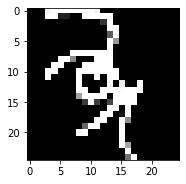

In [40]:
instance_index = random.choice(range(len(y_test)))

print(f'Index of the chosen instace is: {instance_index}')

character = predict_character(instance_index)

print(f'Predicted character: {character}')